## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
% tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_trainorg), (x_test, y_testorg) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [64]:
class_names = [' T-shirt','Trouse','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[0]


' T-shirt'

###4. Find no.of samples in training and test dataset

In [72]:
x_train.shape, y_trainorg.shape,x_test.shape, y_testorg.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [73]:
# No of Samples are
x_train.shape[0], y_trainorg.shape[0],x_test.shape[0], y_testorg.shape[0]

(60000, 60000, 10000, 10000)

###5. Find dimensions of an image in the dataset

In [7]:
x_train.shape[1], x_train.shape[2]

(28, 28)

### 6. Verify if existing labels/Classes are correct 

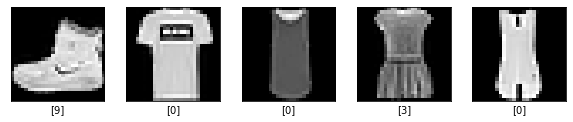

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel([y_trainorg[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train = tf.keras.utils.to_categorical(y_trainorg, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_testorg, num_classes=10)

In [76]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [25]:
x_train.max(), x_train.min(),x_test.max(),x_test.min()

(255, 0, 255, 0)

In [0]:
x_trainNorm = (x_train-0)/(255)

In [0]:
x_testNorm = (x_test-0)/(255)

In [31]:
x_testNorm.max(), x_trainNorm.max()

(1.0, 1.0)

In [34]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [36]:

x_trainNorm[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_traindim = tf.keras.backend.expand_dims(x_trainNorm,axis = -1)
x_testdim = tf.keras.backend.expand_dims(x_testNorm,axis = -1)

In [39]:
x_traindim.shape, x_testdim.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Dropout



#Claearing the session
tf.keras.backend.clear_session()### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [108]:
#Claearing the session
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
#First convolution layer
model.add(tf.keras.layers.Conv2D(32#no of filters
                                 ,kernel_size=(3,3), activation='relu'))
#Second convolution layer
model.add(tf.keras.layers.Conv2D(32#no of filters
                                 ,kernel_size=(3,3), activation='relu'))
# Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128,activation = 'relu'))

#Output layer
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

#Complile the model
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#print(model.summary())
# y values are numpy and x value are tensorflow so we need to go with one datatypes. I converted y values to tensors
#model.fit(x_traindim,y_train,validation_data=(x_testdim,y_test), epochs=10,batch_size=32)
model.fit(x_traindim,tf.convert_to_tensor(y_train),validation_data=(x_testdim,tf.convert_to_tensor(y_test)), epochs=10,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3763 - accuracy: 0.8641 - val_loss: 0.2862 - val_accuracy: 0.8954
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2333 - accuracy: 0.9141 - val_loss: 0.2657 - val_accuracy: 0.9069
Epoch 3/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1733 - accuracy: 0.9359 - val_loss: 0.2449 - val_accuracy: 0.9139
Epoch 4/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1245 - accuracy: 0.9539 - val_loss: 0.2645 - val_accuracy: 0.9165
Epoch 5/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0839 - accuracy: 0.9692 - val_loss: 0.2882 - val_accuracy: 0.9171
Epoch 6/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0576 - accuracy: 0.9793 - val_loss: 0.3706 - val_accuracy: 0.9152
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [107]:
#Claearing the session
tf.keras.backend.clear_session()

model1 = tf.keras.models.Sequential()
#First convolution layer
model1.add(tf.keras.layers.Conv2D(32#no of filters
                                 ,kernel_size=(3,3), activation='relu'))
#Second convolution layer
model1.add(tf.keras.layers.Conv2D(32#no of filters
                                 ,kernel_size=(3,3), activation='relu'))
#MaxPool layer
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Dropoutlayer
model1.add(tf.keras.layers.Dropout(0.25))

# Flatten the output
model1.add(tf.keras.layers.Flatten())

#Dense layer
model1.add(tf.keras.layers.Dense(128,activation = 'relu'))

#Output layer
model1.add(tf.keras.layers.Dense(10,activation = 'softmax'))

#Complile the model
model1.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#print(model.summary())
# y values are numpy and x value are tensorflow so we need to go with one datatypes. I converted y values to tensors
#model.fit(x_traindim,y_train,validation_data=(x_testdim,y_test), epochs=10,batch_size=32)
model1.fit(x_traindim,tf.convert_to_tensor(y_train),validation_data=(x_testdim,tf.convert_to_tensor(y_test)), epochs=10,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3965 - accuracy: 0.8572 - val_loss: 0.2989 - val_accuracy: 0.8891
Epoch 2/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2551 - accuracy: 0.9064 - val_loss: 0.2551 - val_accuracy: 0.9033
Epoch 3/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2087 - accuracy: 0.9226 - val_loss: 0.2327 - val_accuracy: 0.9147
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1753 - accuracy: 0.9352 - val_loss: 0.2199 - val_accuracy: 0.9224
Epoch 5/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1491 - accuracy: 0.9442 - val_loss: 0.2283 - val_accuracy: 0.9208
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1281 - accuracy: 0.9517 - val_loss: 0.2346 - val_accuracy: 0.9239
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [81]:
model1.evaluate(x_testdim,y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.2724 - accuracy: 0.9275


[0.2724157355964184, 0.9275]

In [109]:
model.evaluate(x_testdim,y_test)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.5293 - accuracy: 0.9129


[0.529299031043984, 0.9129]

####14. Verify performance of your model selectively 

In [0]:
#predictions = model2.predict(x_train_reshaped)
import numpy as np
predictions = model1.predict(x_traindim)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
# Checking on  predicted_label = np.argmax(predictions_array)

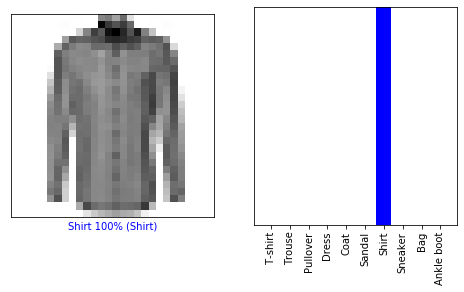

In [96]:

#Replace value of i with other index to check other product
i = 3000
color='blue'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
#plot_image(i, predictions[i], y_train, x_train)
plot_image(i, predictions[i],y_trainorg, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_trainorg)
plt.show()

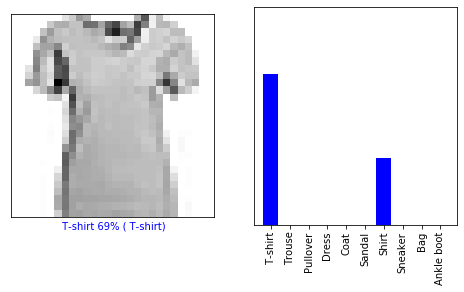

In [106]:
# Trying on the test data here
#Replace value of i with other index to check other product
predictions = model.predict(x_testdim)
i = 4000
color='blue'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
#plot_image(i, predictions[i], y_train, x_train)
plot_image(i, predictions[i],y_testorg, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_testorg)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,vertical_flip= True, rotation_range= 5)

In [0]:
datagen.fit(x_traindim)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

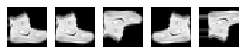

In [121]:
from matplotlib import pyplot as plt
#gen = datagen.flow(x_train[0:1], batch_size=1)
gen = datagen.flow(x_traindim[0:1], batch_size=1)
plt.figure(figsize=(5,5))
for i in range(1,6):
    plt.subplot(1,6,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()